In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv(url, names=columns)


In [5]:
X = df.iloc[:, 0:4].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

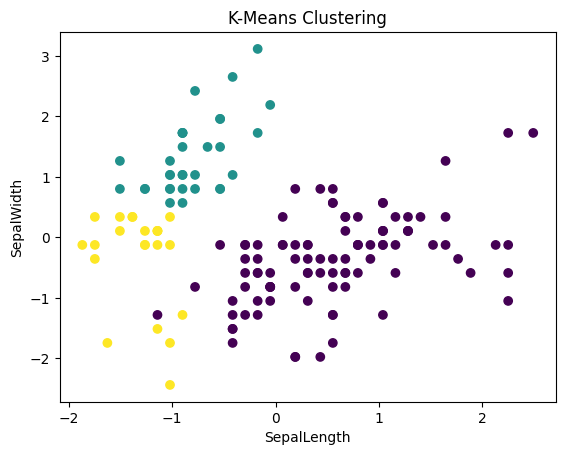

In [8]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()


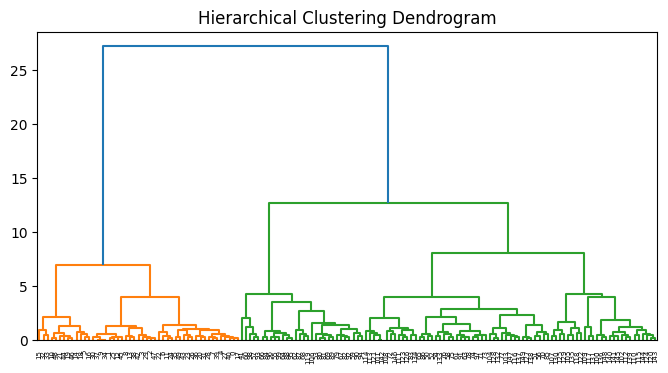

In [9]:
# 2. Hierarchical Clustering
Z = linkage(X_scaled, method='ward') # Ward method
labels_h = fcluster(Z, t=3, criterion='maxclust')
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

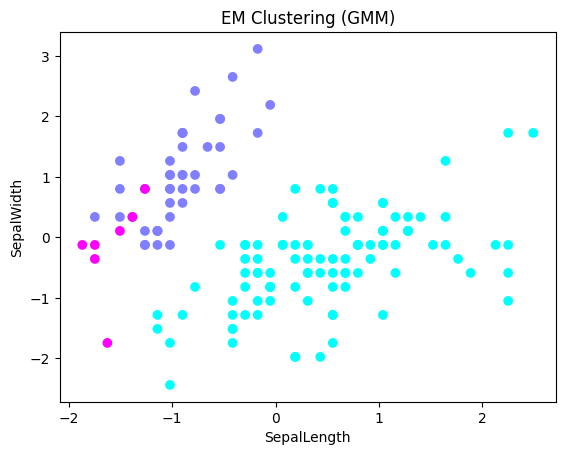

In [10]:
# 3. EM Clustering (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='cool')
plt.title("EM Clustering (GMM)")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()

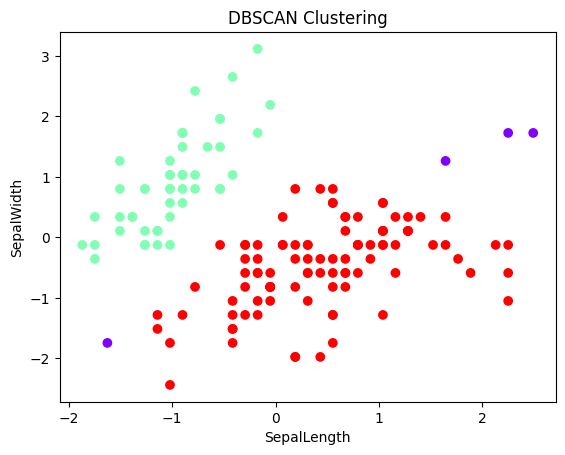

In [13]:
# 4. DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()